In [11]:
import os, sys
import traceback
from Module.allo_chain import *
from Module.count import *
from Module.denoise import *
from Module.network import *
plt.style.use('classic')

In [12]:
def data_list(path):
    data_load = []
    for i in os.listdir(path):
        j = i.split('.')
        if 'txt' in j:
            data_load.append(i)
    return data_load

In [13]:
data_path = './data' #The path of 'data' folder

Text_path = data_path + '/Text/'                   #put your text here
#----------------------------------------------------------------------
Ndom_path = data_path + '/N_dom/'                  #the output folder of N-dom distribution plot
Chain_path = data_path + '/Chain/'                   #the output folder of chain-rank plot
Allo_path = data_path + '/Allocation/'             #the output folder of allocation-rank plot
RRD_path = data_path + '/RRD/'                     #the output folder of RRD plot
FRD_path = data_path + '/FRD/'                     #the output folder of FRD plot
Geo_path = data_path + '/Geometric seq/'           #the output folder of geometric sequence plot
SC_path = data_path + '/SC/'                       #the output document of rg plot and SC value
fitting_path = data_path + '/fitting/'             #the output document of scaling lines fitting
network_path = data_path + '/network/'             #the output document of network analysis
#----------------------------------------------------------------------
Big_path = data_path + '/Statistical result/'      #the output folder of all statistical data in execl


data_load = data_list(Text_path)
Text_load = [Text_path + i for i in data_load]
for i in data_load:
    print(i)

Platyfish.txt
chicken.txt
sim.txt
ON24lambda05.txt
ON24lambda049.txt
ON24lambda0465.txt
Alpaca.txt
zebrafish.txt
mouse.txt
ON24constO.txt
human.txt


In [14]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)

def main():
    error_list = []
    #-------------------check if folders exist-----------------------------
    PATH = [Ndom_path, Chain_path, Allo_path, RRD_path, FRD_path, Geo_path, SC_path,
            fitting_path, network_path, Big_path]
    for P in PATH:
        try:           
            os.makedirs(P)  #create the folder
        except:
            print('***The folder "%s" already exist.' % P)
    #----------------------------------------------------------------------
    for Q in range(len(data_load)):
        try:
            filename = data_load[Q]
            name = filename.split('.')[0]
            big, dom, protein, longest = info(Text_load[Q], encode)
            count_allo(protein, dom)
            print('Successfully count allocation and chain!' + '(%s)' % filename)
            write_to_excel(big, protein, dom, Big_path + name)
            #--------------plot N-dom plot
            FORMAT = 'png' #the format of your picture
            Path = Ndom_path
            N_dom_dist(name, big, longest, FORMAT, Path)
            
            #--------------plot geometric_sequence
            V, H = geometric_sequence(protein, dom)
            max_range = 50 #the number of elements in the sequence you want to know
            x = 'H'
            FORMAT = 'png' #the format of your picture
            shift = 'N' #If you don't want to measure shift, just assign shift != 'T'.
            Path = Geo_path
            
            RH = which_plot(name, V, H, x, max_range, shift, FORMAT, Path)
            #--------------plot FRD plot
            FORMAT = 'png' #the format of your picture
            #auto positioning when (x_pos, y_pos)=(0, 0)
            x_pos = 0
            y_pos = 0
            Path = FRD_path

            Zipf = FRD_plot(name, protein, dom, x_pos, y_pos, FORMAT, Path)
            #--------------plot RRD plot
            need_line = 'Y'
            number_of_lines = 4
            Color = '#ff0000'
            FORMAT = 'png' #the format of your picture
            Path = RRD_path

            coordinate = draw_RRD_plot(big, protein, dom, longest, name, V, H,
                           need_line, number_of_lines, Color, FORMAT, Path)
            #--------------plot allocation-rank plot
            FORMAT = 'png' #the format of your picture
            x_pos = 0 #auto positioning = 0; otherwise change the value you want
            y_pos = 0 #auto positioning = 0; otherwise change the value you want
            Path = Allo_path

            Allo_plot(name, dom, x_pos, y_pos, FORMAT, Path)
            #--------------plot chain-rank plot
            FORMAT = 'png' #the format of your picture
            x_pos = 0 #auto positioning = 0; otherwise change the value you want
            y_pos = 0 #auto positioning = 0; otherwise change the value you want
            Path = Chain_path

            Chain_plot(name, protein, x_pos, y_pos, FORMAT, Path)
            #--------------Network analysis
            graph_word, graph_syl = build_edge(coordinate)
            G_word, cluster_word, word_degree_sequence = graph_word[0], graph_word[1], graph_word[2]
            G_syl, cluster_syl, syl_degree_sequence = graph_syl[0], graph_syl[1], graph_syl[2]            
            FORMAT = 'pdf'
            Path = network_path
            
            plot_degree_word(name, word_degree_sequence, FORMAT, Path)
            plot_degree_syl(name, syl_degree_sequence, FORMAT, Path)
            #--------------calculate SC and fitting scaling lines
            FORMAT = 'png' #the format of your picture
            
            g, glu = plot_g(4, V, H, big, name, longest, toler = 50, avg_N = 50)
            Rg = rg(name, g, FORMAT, SC_path)
            fit_para = fit_with_cut(glu, Rg[0], V, H, Zipf, name, FORMAT, fitting_path)
            print('Successfully run all!' + '(%s)' % filename)
        #--------------add filename to error_list when error      
        except Exception as exc:
            traceback.print_exc()
            error_list.append(data_load[Q])
            print('')
    if error_list != []:
        print('The following file get error when running:')
        for i in error_list:
            print(i)

***The folder "./data/N_dom/" already exist.
***The folder "./data/Chain/" already exist.
***The folder "./data/Allocation/" already exist.
***The folder "./data/RRD/" already exist.
***The folder "./data/FRD/" already exist.
***The folder "./data/Geometric seq/" already exist.
***The folder "./data/SC/" already exist.
***The folder "./data/fitting/" already exist.
***The folder "./data/network/" already exist.
***The folder "./data/Statistical result/" already exist.
read file successfully!
Successfully count protein freqency!(./data/Text/Platyfish.txt)
Successfully count dom freqency!
Successfully build data frames!
Successfully count allocation and chain!(Platyfish.txt)


/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** s


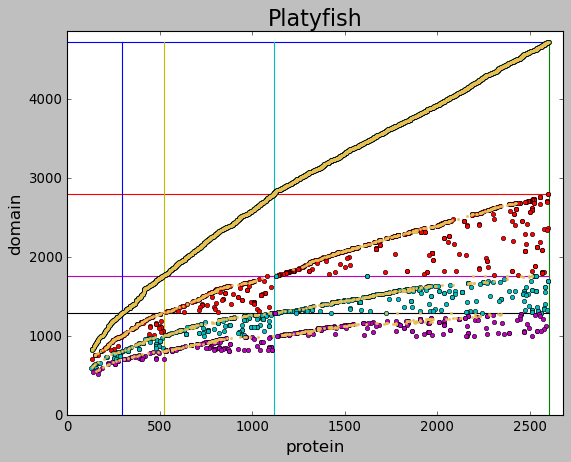

C < 0.8: g4/g3, 0.740000
fitting range = [650, 2600]
Successfully run all!(Platyfish.txt)
read file successfully!
Successfully count protein freqency!(./data/Text/chicken.txt)
Successfully count dom freqency!
Successfully build data frames!
Successfully count allocation and chain!(chicken.txt)


/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** s


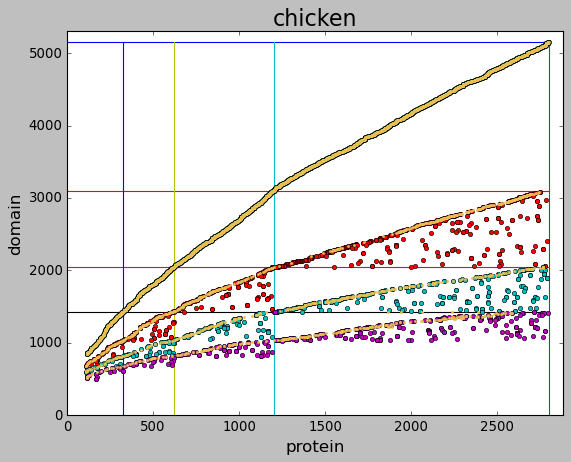

fitting range = [699, 2798]
Successfully run all!(chicken.txt)
read file successfully!
Successfully count protein freqency!(./data/Text/sim.txt)
Successfully count dom freqency!
Successfully build data frames!
Successfully count allocation and chain!(sim.txt)


/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** s


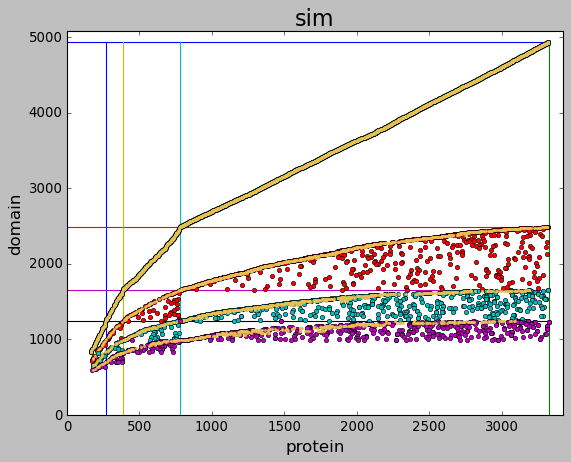

fitting range = [830, 3323]
Successfully run all!(sim.txt)
read file successfully!
Successfully count protein freqency!(./data/Text/ON24lambda05.txt)
Successfully count dom freqency!
Successfully build data frames!
Successfully count allocation and chain!(ON24lambda05.txt)


/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
Traceback (most recent call last):
  File "<ipython-input-14-62f66c06010b>", line 72, in main
    g, glu = plot_g(4, V, H, big, name, longest, toler = 50, avg_N = 50)
  File "/Users/lab/Downloads/Scaling-DNA/Module/denoise.py", line 162, in plot_g
    px, py = sort_point(M, N, points)
  File "/Users/lab/Downloads/Scaling-DNA/Module/denoise.py", line 48, in sort_point
    if p[i] == []:
IndexError: list index out of range



read file successfully!
Successfully count protein freqency!(./data/Text/ON24lambda049.txt)
Successfully count dom freqency!
Successfully build data frames!
Successfully count allocation and chain!(ON24lambda049.txt)


/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** s


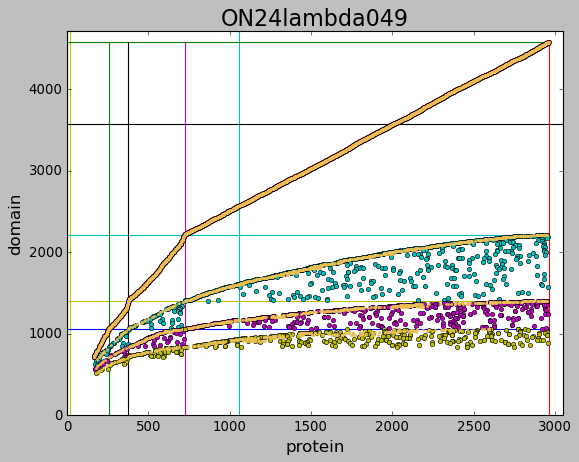

fitting range = [740, 2961]
Successfully run all!(ON24lambda049.txt)
read file successfully!
Successfully count protein freqency!(./data/Text/ON24lambda0465.txt)
Successfully count dom freqency!
Successfully build data frames!
Successfully count allocation and chain!(ON24lambda0465.txt)


/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in add
  P = P + 1 / k ** s
/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** s


the (6, 5) block have no points.
the (6, 5) block have no points.
the (7, 5) block have no points.
the (7, 4) block have no points.
the (8, 5) block have no points.
the (7, 4) block have no points.
the (8, 5) block have no points.


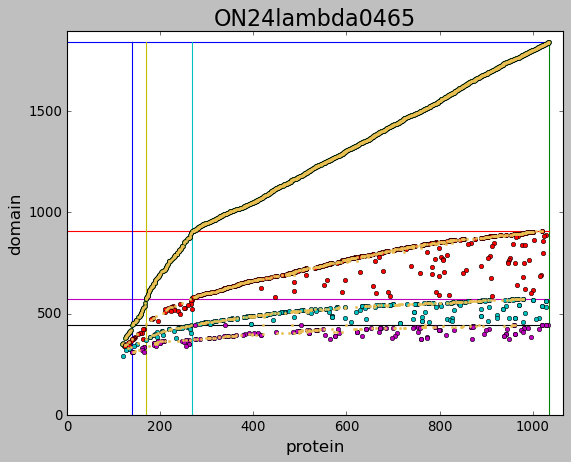

fitting range = [258, 1034]
Successfully run all!(ON24lambda0465.txt)
read file successfully!
Successfully count protein freqency!(./data/Text/Alpaca.txt)
Successfully count dom freqency!
Successfully build data frames!
Successfully count allocation and chain!(Alpaca.txt)


/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** s


the (6, 5) block have no points.
the (7, 5) block have no points.
the (7, 5) block have no points.
the (8, 5) block have no points.


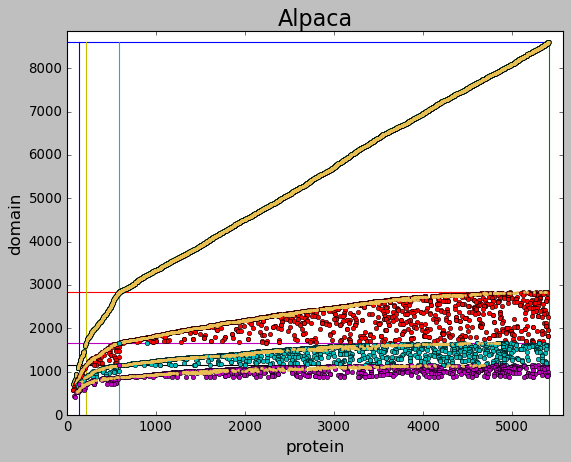

fitting range = [1351, 5407]
Successfully run all!(Alpaca.txt)
read file successfully!
Successfully count protein freqency!(./data/Text/zebrafish.txt)
Successfully count dom freqency!
Successfully build data frames!
Successfully count allocation and chain!(zebrafish.txt)


/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** s


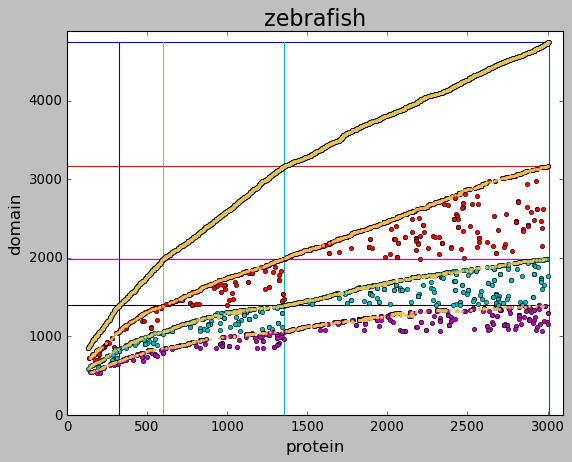

fitting range = [751, 3006]
Successfully run all!(zebrafish.txt)
read file successfully!
Successfully count protein freqency!(./data/Text/mouse.txt)
Successfully count dom freqency!
Successfully build data frames!
Successfully count allocation and chain!(mouse.txt)


/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** s


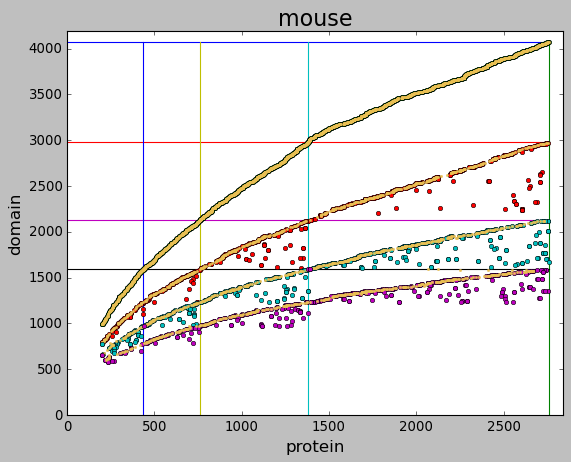

fitting range = [689, 2758]
Successfully run all!(mouse.txt)
read file successfully!
Successfully count protein freqency!(./data/Text/ON24constO.txt)
Successfully count dom freqency!
Successfully build data frames!
Successfully count allocation and chain!(ON24constO.txt)


/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** s


the (6, 5) block have no points.


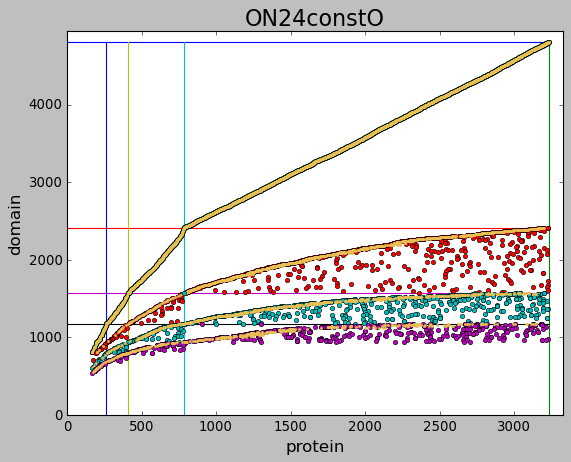

fitting range = [807, 3231]
Successfully run all!(ON24constO.txt)
read file successfully!
Successfully count protein freqency!(./data/Text/human.txt)
Successfully count dom freqency!
Successfully build data frames!
Successfully count allocation and chain!(human.txt)


/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
/Users/lab/Downloads/Scaling-DNA/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** s


the (2, 1) block have no points.


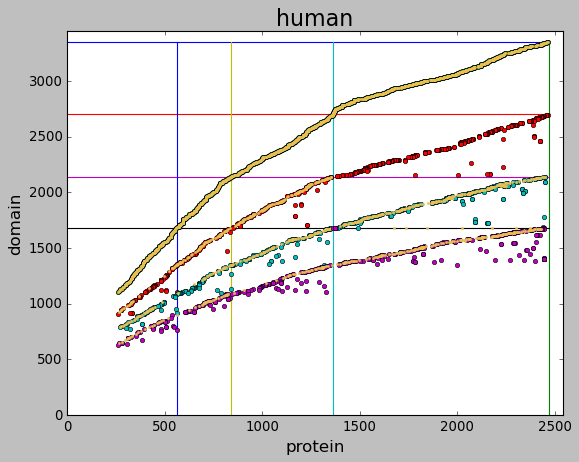

C < 0.8: g3/g2, 0.380000
fitting range = [617, 2468]
Successfully run all!(human.txt)
The following file get error when running:
ON24lambda05.txt


In [15]:
main()